### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Reading the dataset

In [2]:
pet_df=pd.read_csv('pet_sales.csv')
pet_df.info()
pet_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    object 
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 61.9+ KB


,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0


## Cleaning the Sales cloumn

In [3]:
remove_chars=['$',',']
for char in remove_chars:
    pet_df['sales']=pet_df['sales'].apply(lambda x:x.replace(char,''))
pet_df.info()
pet_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    object 
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 61.9+ KB


,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,1
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,0
2,4237,Toys,218000,106.34,VC_802,small,hamster,6,0
3,4364,Snack,69000,241.27,VC_929,large,dog,1,1
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,0


In [4]:
pet_df['sales']=pet_df['sales'].astype('int64')
pet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    int64  
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 61.9+ KB


## Removing rows where pet types are not  one of “cat”,“dog”, “fish”, “bird”.

In [5]:
pet_types=pet_df['pet_type'].unique()
pet_types

array(['fish', 'cat', 'hamster', 'dog', 'bird', 'rabbit'], dtype=object)

In [6]:
pet_df.drop(pet_df[(pet_df['pet_type']=='hamster') | (pet_df['pet_type']=='rabbit')].index,inplace=True)

## Exploratory Analysis

In [7]:
rebuy_count=pet_df['re_buy'].value_counts()
rebuy_count

0    443
1    390
Name: re_buy, dtype: int64

In [8]:
rebuy_sales_avg=pet_df.groupby('re_buy')['sales'].mean()
rebuy_sales_avg

re_buy
0    115406.320542
1    116889.743590
Name: sales, dtype: float64

In [9]:
morethanavg_products=pet_df[(pet_df['sales']>116890) & (pet_df['re_buy']==0)]
morethanavg_products

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,0
5,4609,Bedding,183000,51.60,VC_1174,large,cat,10,0
7,4389,Bedding,205000,170.01,VC_954,large,cat,9,0
13,4319,Food,192000,60.11,VC_884,large,cat,3,0
15,4890,Equipment,182000,173.07,VC_1455,small,dog,6,0
...,...,...,...,...,...,...,...,...,...
861,4909,Snack,210000,212.54,VC_1474,medium,cat,6,0
863,4997,Toys,220000,176.38,VC_1562,medium,bird,6,0
865,4495,Food,159000,36.02,VC_1060,extra_small,cat,4,0
868,4989,Equipment,126000,234.17,VC_1554,medium,bird,6,0


In [10]:
high_rating=morethanavg_products[morethanavg_products['rating']>7]
high_rating

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,0
5,4609,Bedding,183000,51.60,VC_1174,large,cat,10,0
7,4389,Bedding,205000,170.01,VC_954,large,cat,9,0
17,4541,Equipment,185000,109.45,VC_1106,extra_large,cat,10,0
26,4615,Accessory,131000,247.51,VC_1180,extra_small,cat,10,0
...,...,...,...,...,...,...,...,...,...
838,4579,Medicine,205000,190.33,VC_1144,large,cat,10,0
839,4397,Snack,201000,156.14,VC_962,small,cat,9,0
841,4699,Medicine,173000,102.06,VC_1264,large,cat,10,0
843,4569,Supplements,190000,149.34,VC_1134,large,cat,10,0


In [11]:
products_list=high_rating.groupby('pet_type')['product_category'].value_counts()
products_list

pet_type  product_category
cat       Medicine            8
          Bedding             4
          Clothes             4
          Grooming            4
          Supplements         4
          Food                3
          Snack               3
          Accessory           2
          Equipment           2
          Toys                2
dog       Supplements         9
          Food                5
          Accessory           4
          Clothes             4
          Housing             3
          Medicine            3
          Snack               3
          Bedding             2
          Equipment           2
          Grooming            2
          Toys                1
fish      Accessory           1
          Bedding             1
Name: product_category, dtype: int64

In [12]:
rebuy_pet=pet_df[pet_df['re_buy']==1]
rebuy_pet

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,1
3,4364,Snack,69000,241.27,VC_929,large,dog,1,1
9,4238,Medicine,141000,248.07,VC_803,medium,dog,10,1
10,4650,Snack,185000,188.23,VC_1215,extra_small,dog,10,1
12,4588,Housing,93000,211.47,VC_1153,medium,dog,10,1
...,...,...,...,...,...,...,...,...,...
866,4407,Food,177000,133.57,VC_972,small,cat,3,1
873,4343,Equipment,212000,129.84,VC_908,medium,cat,10,1
876,4783,Snack,162000,224.12,VC_1348,medium,cat,7,1
877,4664,Bedding,34000,199.15,VC_1229,large,dog,10,1


In [13]:
rebuy_pet_products=rebuy_pet.groupby('pet_type')['product_category'].value_counts()
rebuy_pet_products

pet_type  product_category
bird      Equipment            7
          Snack                7
          Toys                 7
          Accessory            1
          Bedding              1
          Clothes              1
          Food                 1
          Housing              1
          Medicine             1
          Supplements          1
cat       Equipment           27
          Toys                25
          Snack               19
          Food                18
          Supplements         17
          Medicine            15
          Clothes             10
          Accessory            9
          Bedding              9
          Housing              9
          Grooming             7
dog       Equipment           28
          Snack               25
          Medicine            20
          Toys                19
          Food                17
          Bedding             14
          Supplements         11
          Accessory           10
          Groomi

In [23]:
avg_product_price=pd.DataFrame(rebuy_pet.groupby(['product_category'])['price'].mean().sort_values())
avg_product_price

,price
product_category,
Housing,110.446000
Clothes,113.149474
Supplements,121.070667
Bedding,121.767500
Snack,122.064237
Food,125.212432
Equipment,134.325072
Grooming,135.182941
Accessory,137.944000


## Data Visualization

### Histogram of sales disturbution 

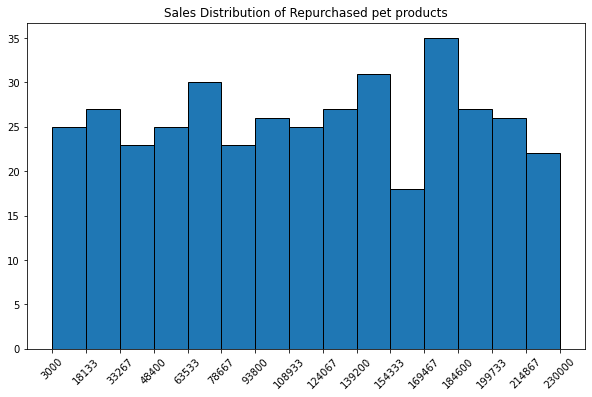

In [15]:
fig = plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(rebuy_pet.sales,bins='rice',edgecolor='black')
plt.xticks(bins,rotation=45)
plt.title('Sales Distribution of Repurchased pet products')
plt.show()


### Price distribution

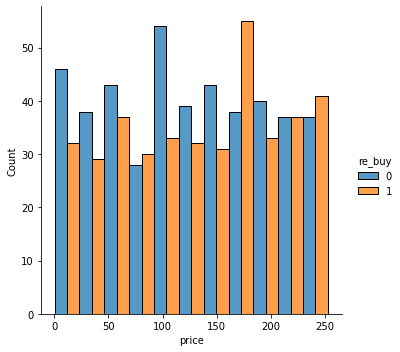

In [16]:
sns.displot(pet_df, x="price", hue="re_buy",multiple="dodge")


### Count plot of ratings

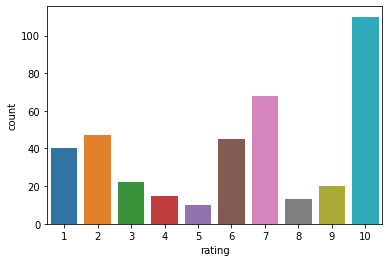

In [17]:
ax=sns.countplot(x='rating',data=rebuy_pet)

In [18]:
low_rating=rebuy_pet[rebuy_pet['rating']<=3]
low_rating

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
3,4364,Snack,69000,241.27,VC_929,large,dog,1,1
20,4478,Housing,210000,195.98,VC_1043,medium,dog,3,1
22,4384,Accessory,204000,134.00,VC_949,large,dog,1,1
36,4208,Accessory,218000,79.99,VC_773,medium,dog,1,1
38,4224,Bedding,12000,142.45,VC_789,large,bird,1,1
...,...,...,...,...,...,...,...,...,...
834,4250,Supplements,68000,130.14,VC_815,extra_small,dog,2,1
857,4808,Toys,118000,229.59,VC_1373,small,dog,2,1
864,4853,Toys,136000,170.26,VC_1418,medium,cat,1,1
866,4407,Food,177000,133.57,VC_972,small,cat,3,1


### displot() of repurchased products with low ratings

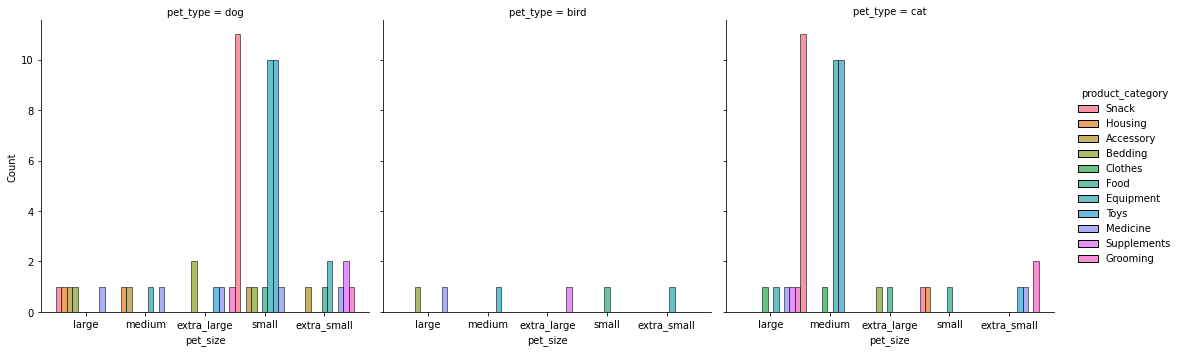

In [19]:
ax=sns.displot(low_rating,x='pet_size',hue='product_category',col='pet_type',multiple="dodge")

### displot() of products with sales more than average of rebuy products with high ratings

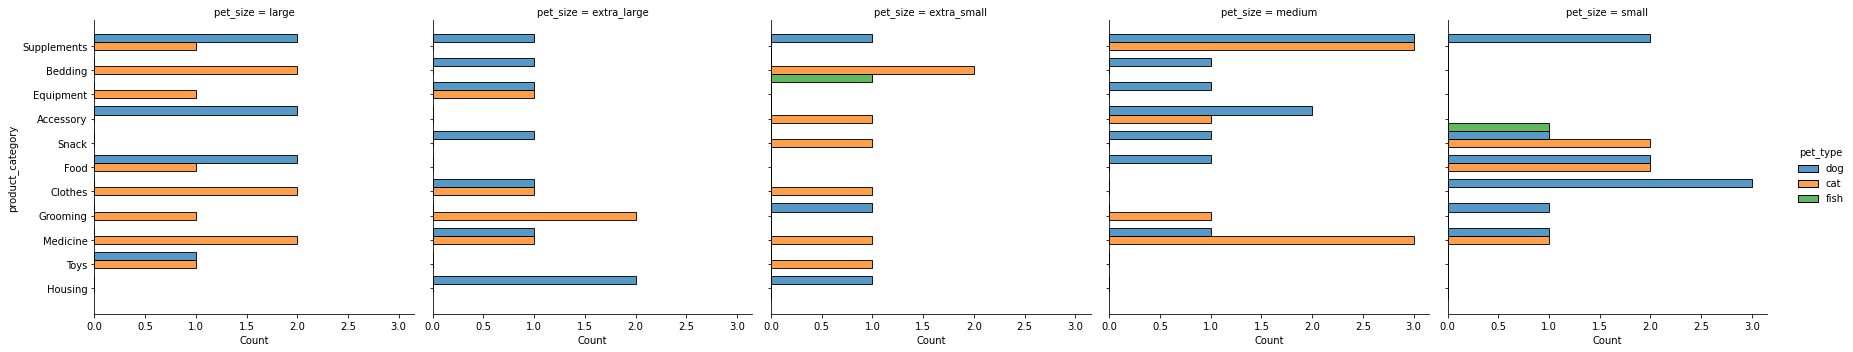

In [20]:
ax=sns.displot(high_rating,y='product_category',hue='pet_type',col='pet_size',multiple="dodge")

### catplot() of repurchased products visualizing the relation of pet type and size with product categories

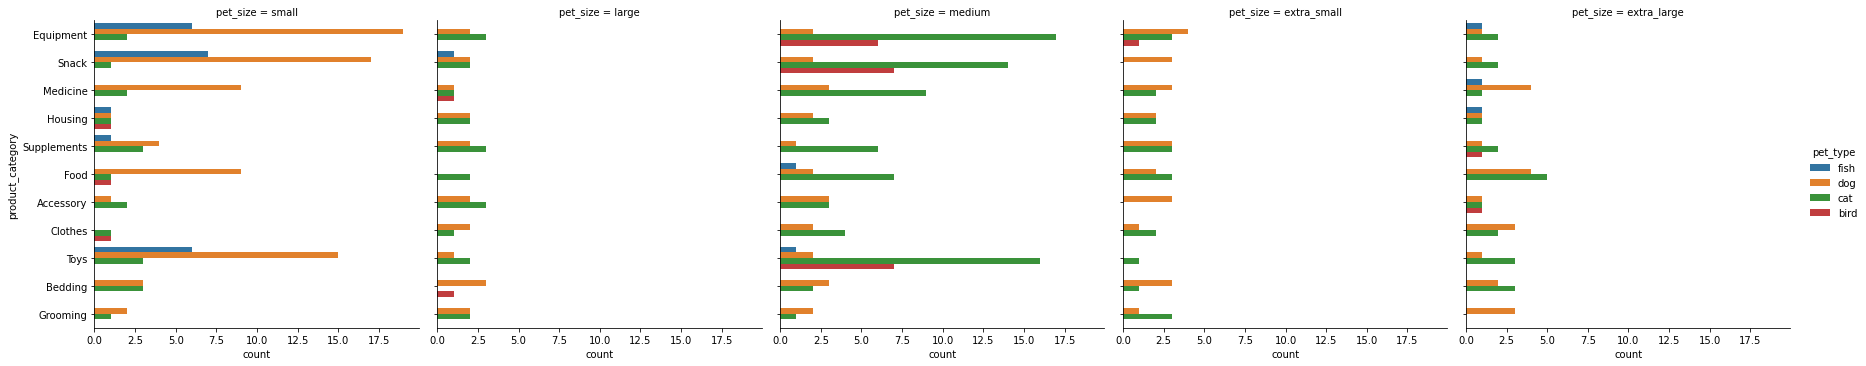

In [21]:
ax=sns.catplot(y='product_category',hue='pet_type',data=rebuy_pet,col='pet_size',kind='count')

### catplot() of entire dataset finding the relation between price and 3 categorical variables

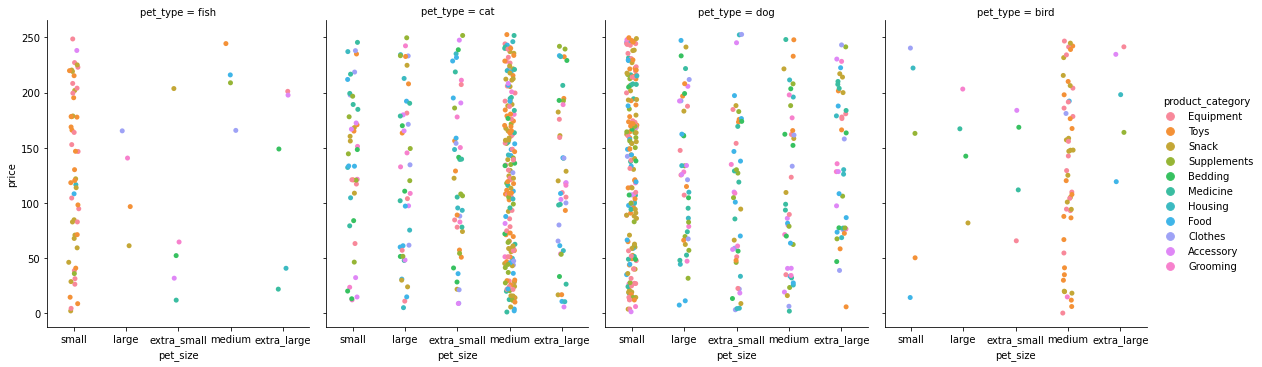

In [22]:
ax=sns.catplot(x='pet_size',y='price',col='pet_type',hue='product_category',data=pet_df,height=5,aspect=.8)